In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KHAS\KHAS 2022-2023 bahar\Mis220\data\train.csv", header=None)
df = pd.DataFrame(df)

In [3]:
cols = []
count = 0 
for i in df.columns:
    count +=1
    cols.append("Column{i}".format(i=count))

In [4]:
df.columns = cols
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column113,Column114,Column115,Column116,Column117,Column118,Column119,Column120,Column121,Column122
0,69769,-946,0.1613,0.7960,Panl,N,Bus2,0.0742,0,2,...,1.0,-4670,0.9851,0.0000,0,Mard,0.0,0.3333,0,0
1,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
2,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0000,0,Sind,0.0,0.3750,0,1
3,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0000,0,Sind,0.0,0.0417,0,1
4,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,NaN,NaN,NaN,N,Bus3,NaN,0,2,...,NaN,-4420,NaN,NaN,0,Mard,0.0,NaN,0,0
246004,257069,-4334,0.1145,0.8368,Panl,N,Mede,0.1180,0,2,...,4.0,-2561,0.9881,0.0000,0,Sind,0.0,0.3333,0,0
246005,154350,365243,0.3025,0.6056,Mixd,N,XNAA,0.2233,0,2,...,1.0,-4636,0.9712,0.0631,0,Cive,0.0,0.1667,0,0
246006,148183,365243,NaN,NaN,NaN,N,XNAA,NaN,0,3,...,5.0,-4636,NaN,NaN,0,Mard,0.0,NaN,0,1


In [5]:
for c,v in df.isnull().sum().items(): 
    if v > (df.shape[0]*(0.20)): #if the missing value is more than 20% of the data, then that column is not informative for me
        df = df.drop(columns=c, axis = 1) #so i drop it

In [6]:
df.Column122.value_counts(normalize=True)


0    0.919271
1    0.080729
Name: Column122, dtype: float64

In [7]:
binary = []
categorical = []
numerical = []
for i in df.columns:
    if df[i].dtypes == "object":
        if df[i].nunique() == 2:
            binary.append(df[i])
        else: 
            categorical.append(df[i])
    elif df[i].dtypes == "int64" or df[i].dtypes == "float64":
        if df[i].nunique() == 2:
            binary.append(df[i])
        else:
            numerical.append(df[i])
# Here i divided the data into three categories

In [8]:
binary = pd.DataFrame(binary).T
binary

,Column6,Column9,Column16,Column20,Column21,Column24,Column25,Column27,Column29,Column30,...,Column99,Column101,Column104,Column105,Column106,Column107,Column109,Column117,Column121,Column122
0,N,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
1,Y,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
2,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,1
3,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,1
4,N,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,N,0,0,0,0,0,1,0,0,0,...,0,0,Revs,1,0,0,0,0,0,0
246004,N,0,0,0,0,0,0,0,0,0,...,0,0,Cass,1,0,0,0,0,0,0
246005,N,0,0,0,0,0,0,0,0,1,...,0,0,Cass,0,0,0,0,0,0,0
246006,N,0,0,0,1,0,0,0,0,0,...,0,0,Cass,0,0,0,0,0,0,1


In [9]:
binary.isnull().sum()

Column6      0
Column9      0
Column16     0
Column20     0
Column21     0
Column24     0
Column25     0
Column27     0
Column29     0
Column30     0
Column34     0
Column43     0
Column47     0
Column48     0
Column51     0
Column53     0
Column56     0
Column63     0
Column65     0
Column66     0
Column72     0
Column76     0
Column77     0
Column82     0
Column95     0
Column98     0
Column99     0
Column101    0
Column104    0
Column105    0
Column106    0
Column107    0
Column109    0
Column117    0
Column121    0
Column122    0
dtype: int64

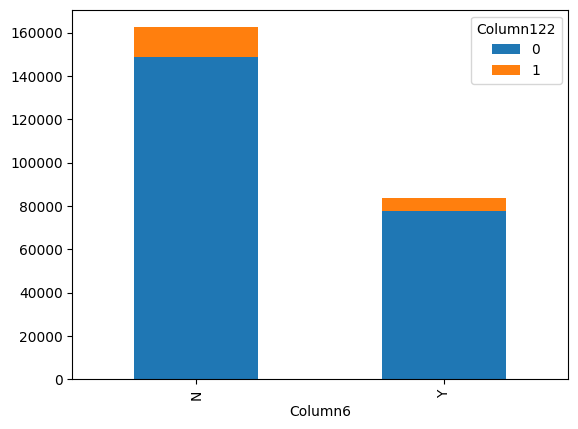

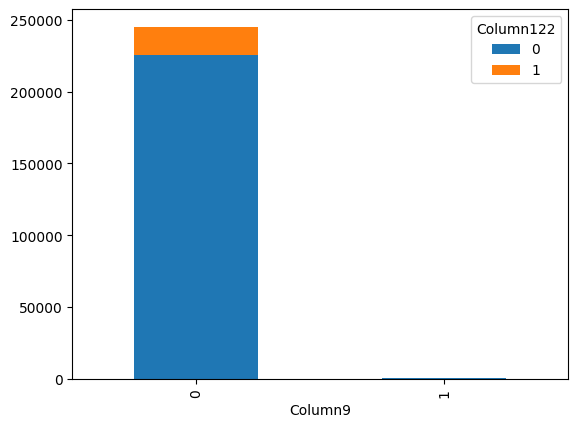

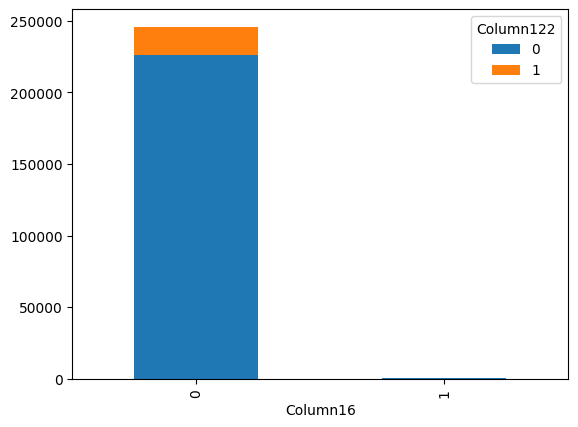

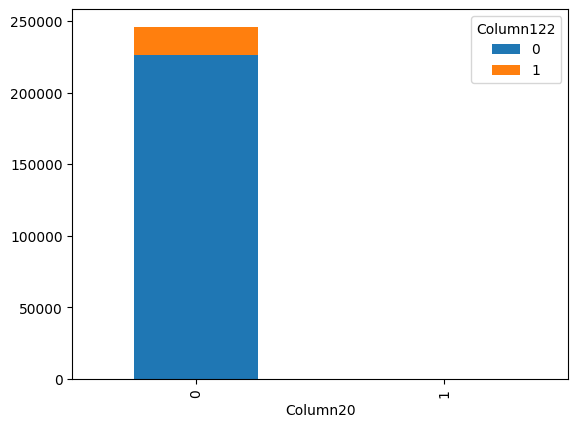

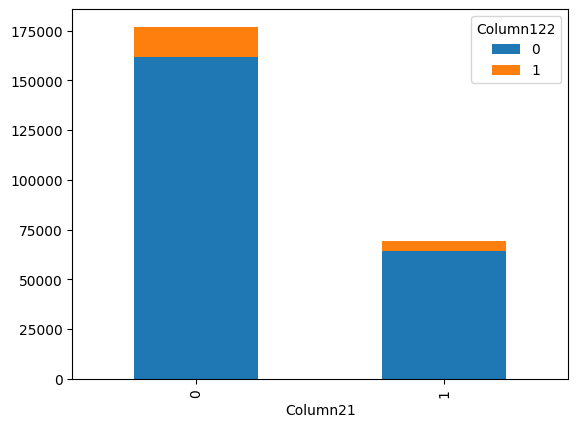

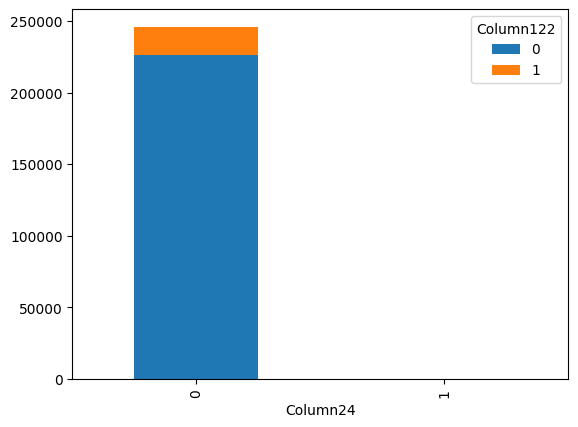

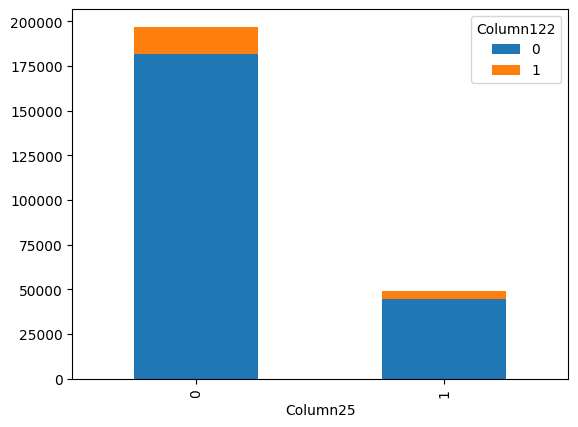

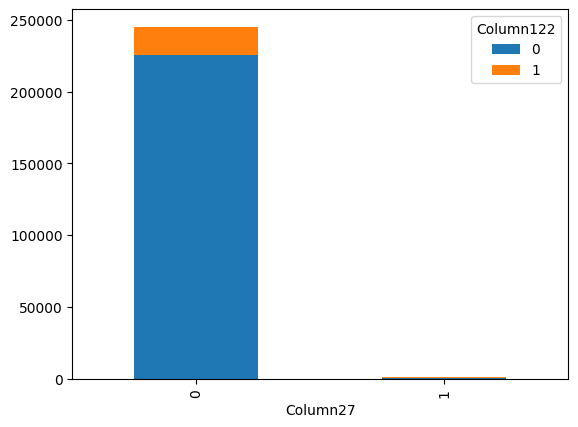

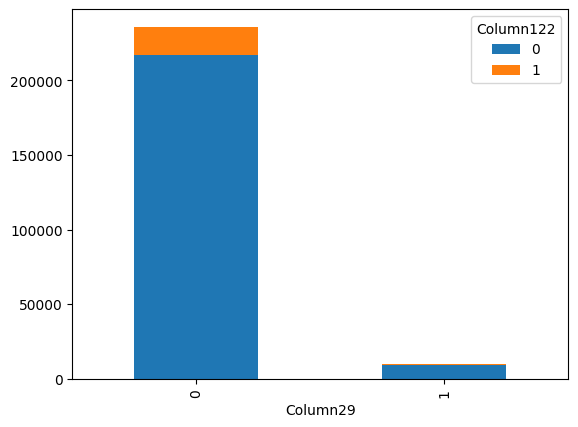

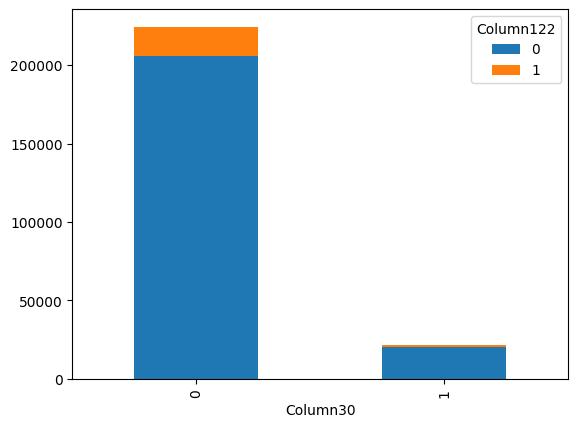

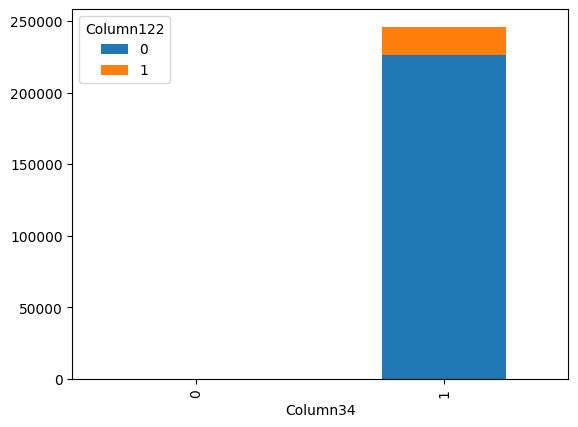

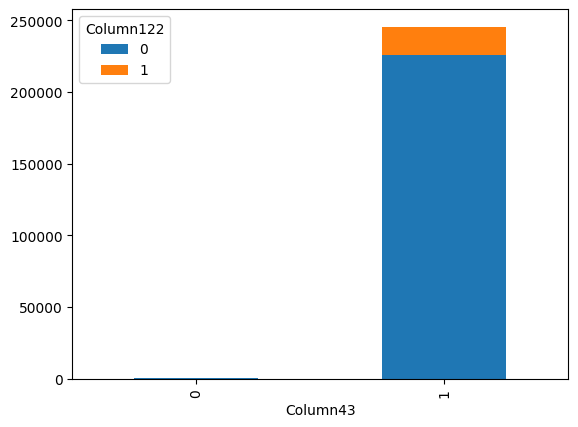

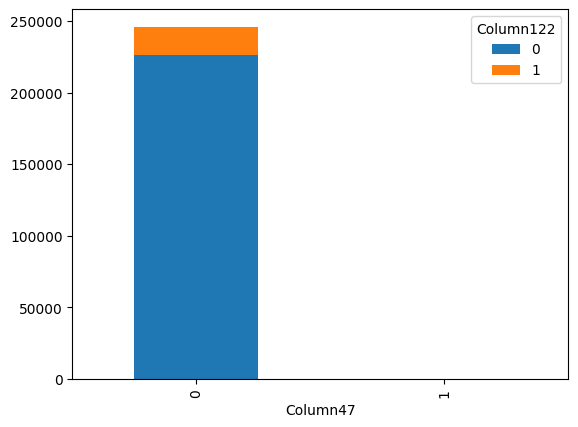

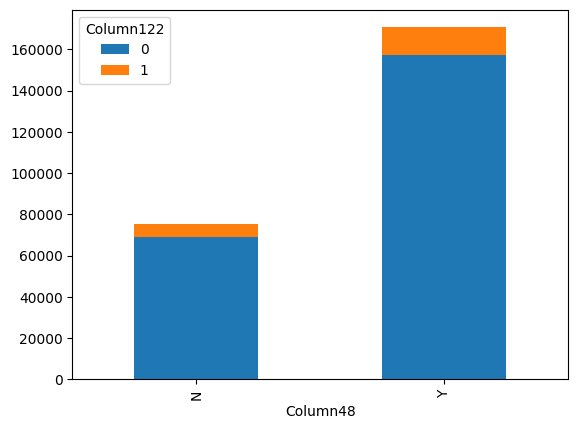

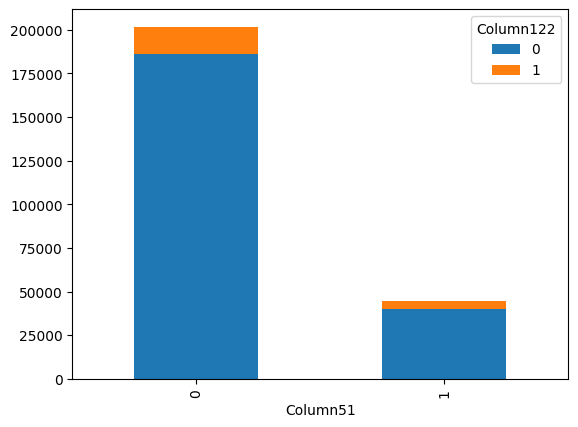

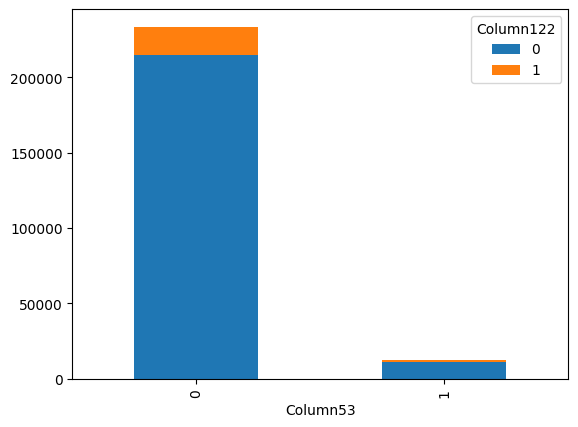

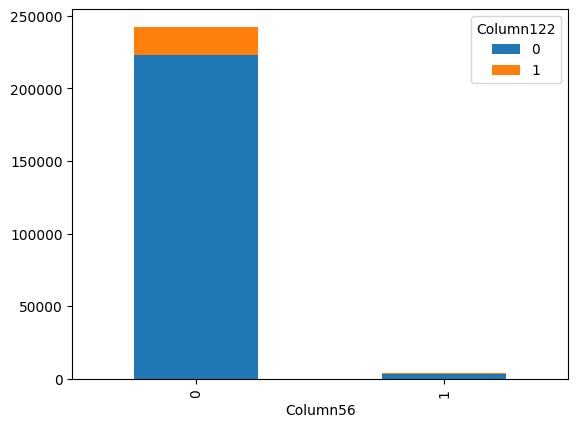

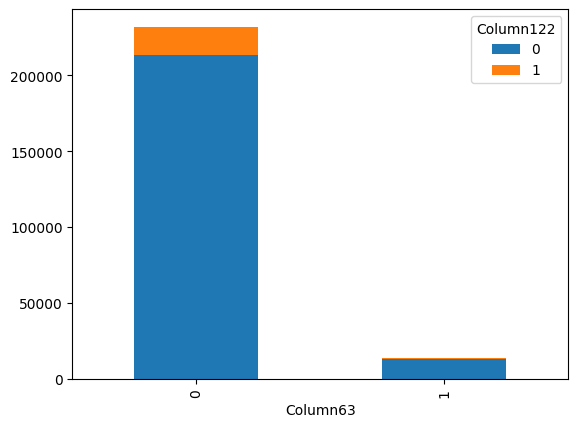

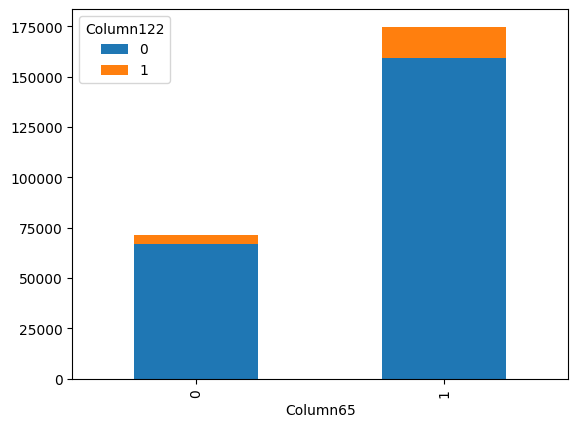

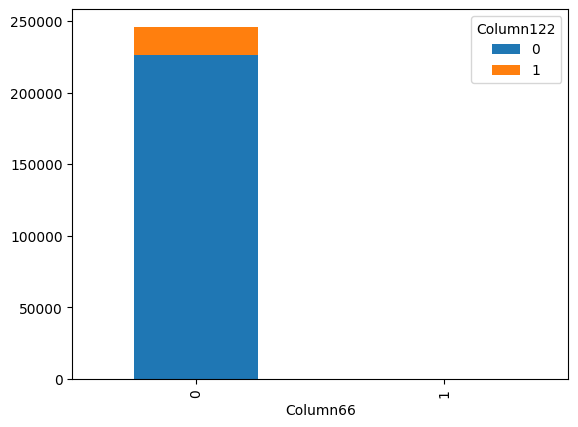

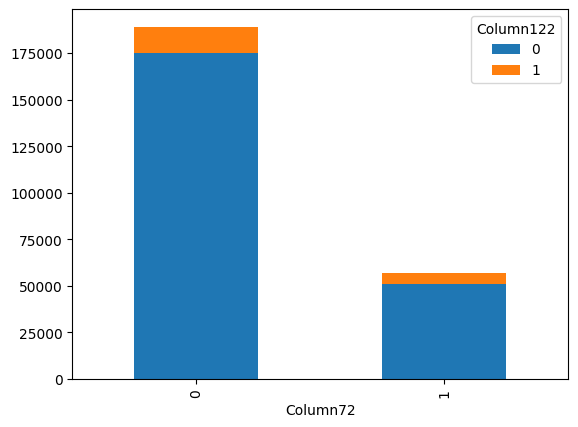

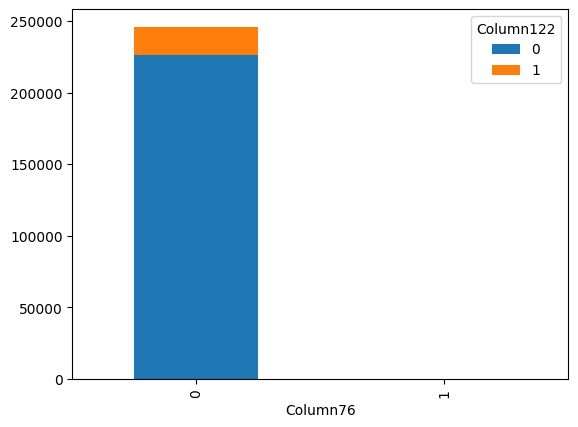

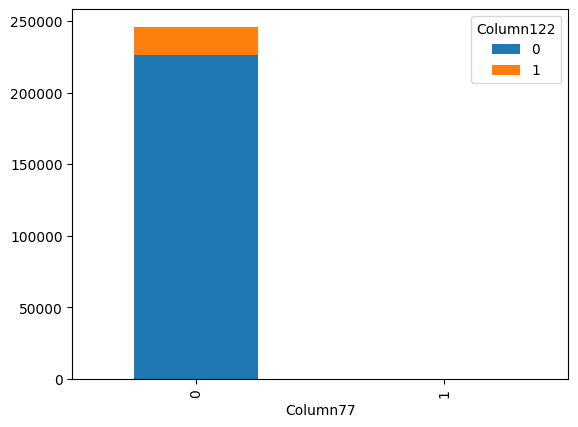

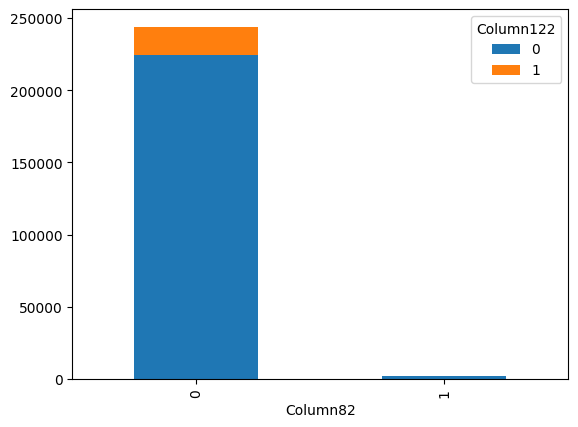

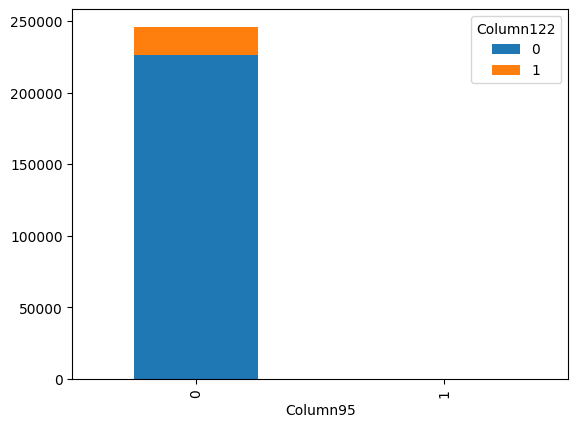

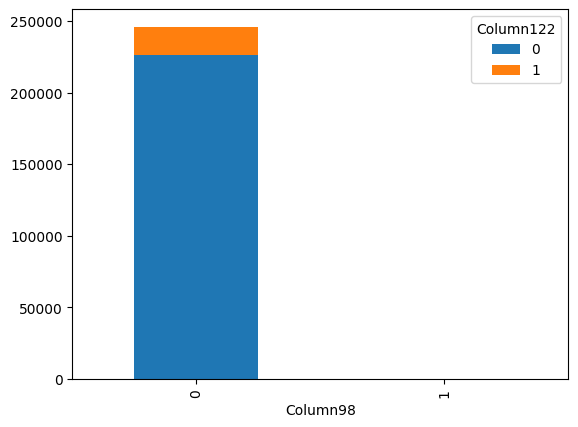

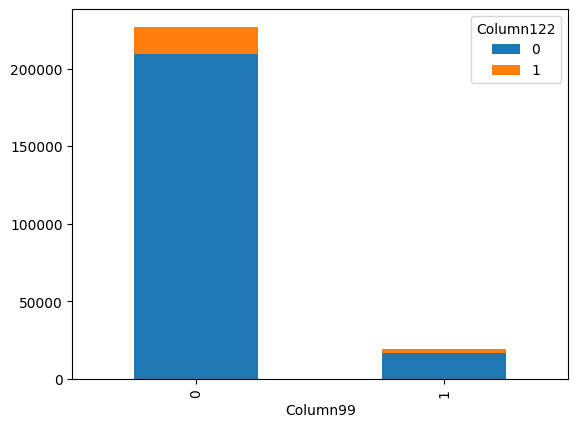

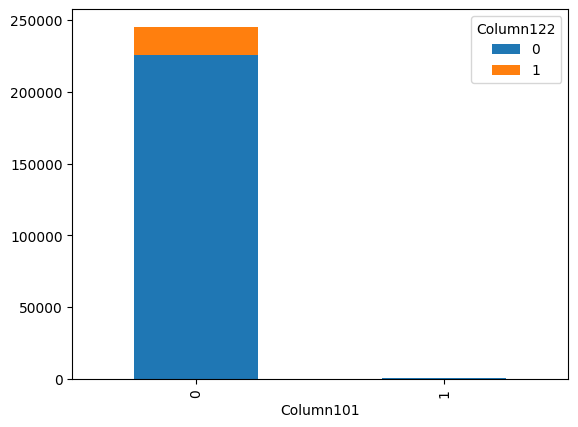

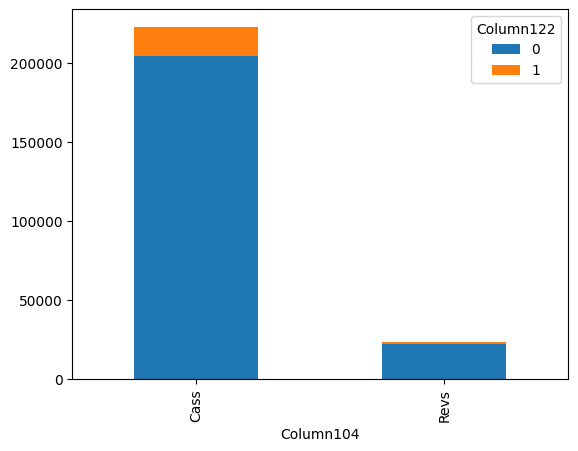

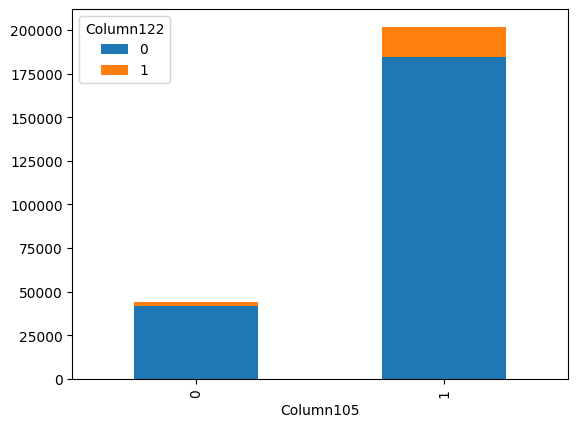

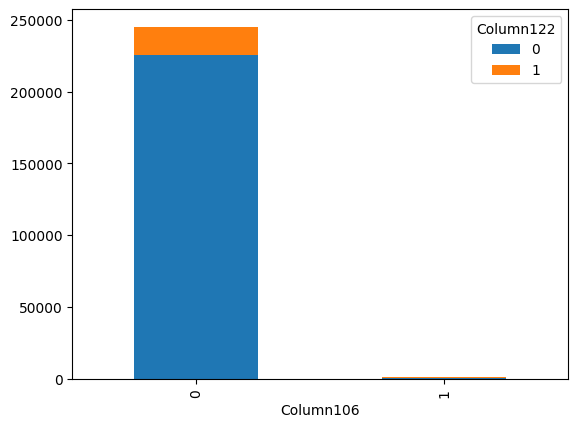

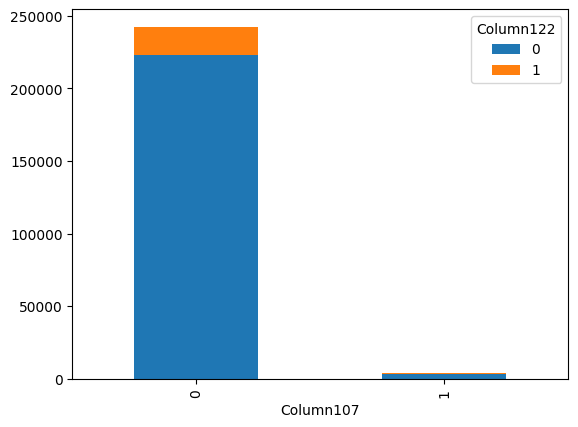

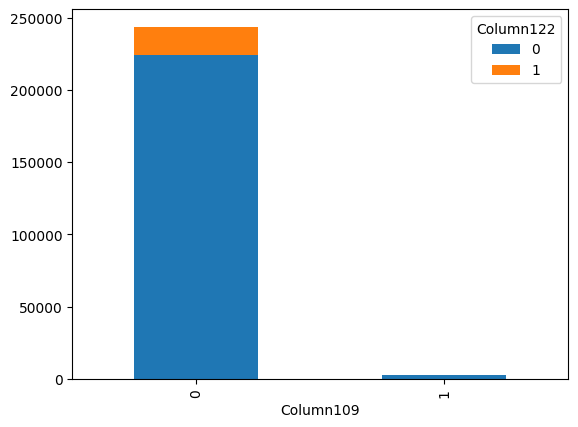

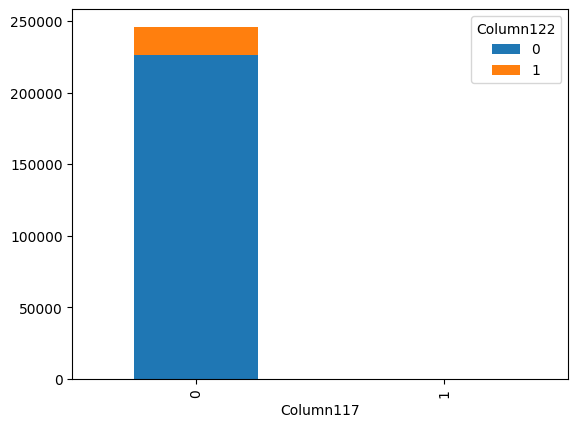

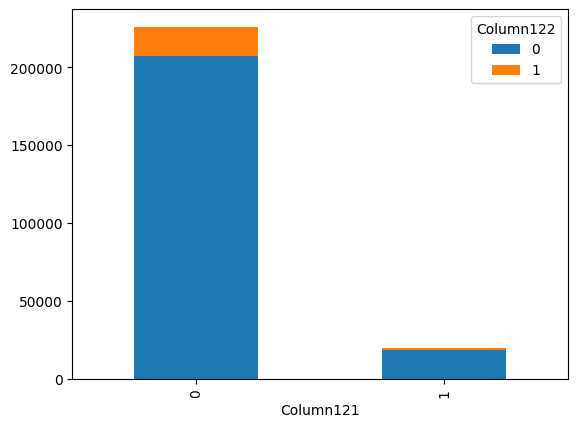

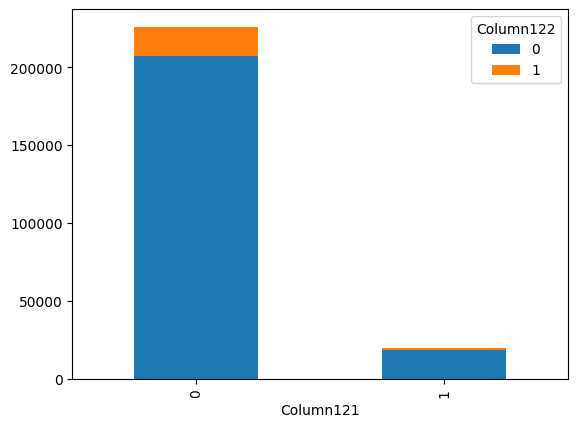

In [10]:
columns = []
for i in binary.columns:
    if i != "Column122":
        crosstable = pd.crosstab(binary[i], df.Column122)
        for b in range(0, 2): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 2): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()

In [11]:
cols = []
for i in columns:
    cols.append(i[0])

In [12]:
cols = set(cols)

In [13]:
cols = list(cols)
cols

['Column43',
 'Column24',
 'Column66',
 'Column95',
 'Column117',
 'Column9',
 'Column109',
 'Column101',
 'Column27',
 'Column16',
 'Column77',
 'Column82',
 'Column98',
 'Column47',
 'Column106',
 'Column34',
 'Column20',
 'Column76']

In [14]:
binary = binary.drop(cols, axis=1)

In [15]:
binary

,Column6,Column21,Column25,Column29,Column30,Column48,Column51,Column53,Column56,Column63,Column65,Column72,Column99,Column104,Column105,Column107,Column121,Column122
0,N,0,0,0,0,N,0,0,0,0,1,0,0,Cass,1,0,0,0
1,Y,0,0,0,0,Y,1,0,0,0,1,1,0,Cass,1,0,0,0
2,N,1,0,0,0,Y,0,0,0,0,1,0,0,Cass,1,0,0,1
3,N,1,0,0,0,N,0,0,0,0,1,0,0,Cass,1,0,0,1
4,N,0,0,0,0,Y,0,0,0,0,1,0,0,Cass,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,N,0,1,0,0,Y,0,0,0,0,0,0,0,Revs,1,0,0,0
246004,N,0,0,0,0,N,0,0,0,0,1,0,0,Cass,1,0,0,0
246005,N,0,0,0,1,N,0,0,0,0,0,0,0,Cass,0,0,0,0
246006,N,1,0,0,0,Y,0,0,0,0,1,0,0,Cass,0,0,0,1


In [16]:
categorical = pd.DataFrame(categorical).T
numerical = pd.DataFrame(numerical).T

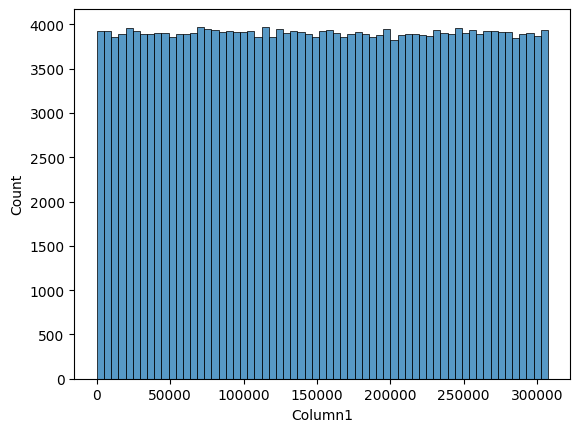

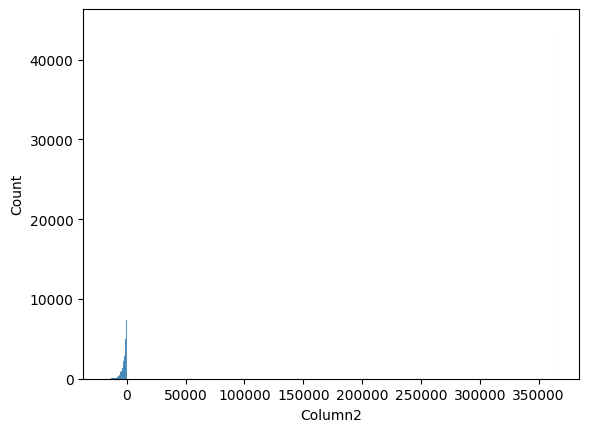

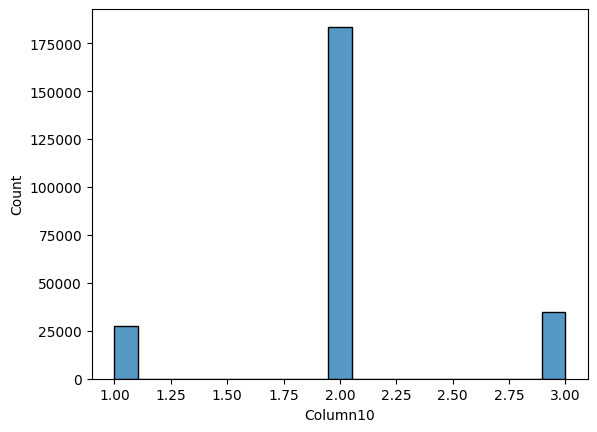

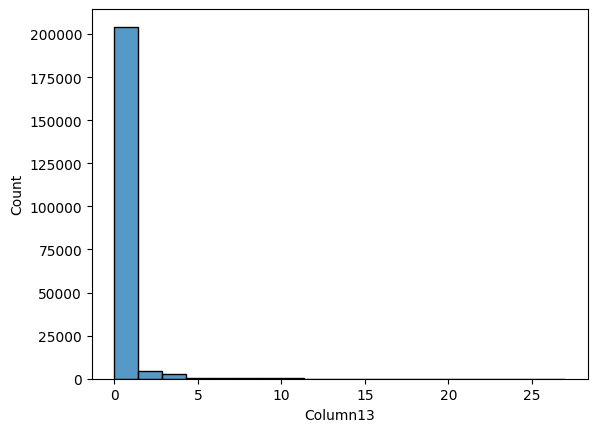

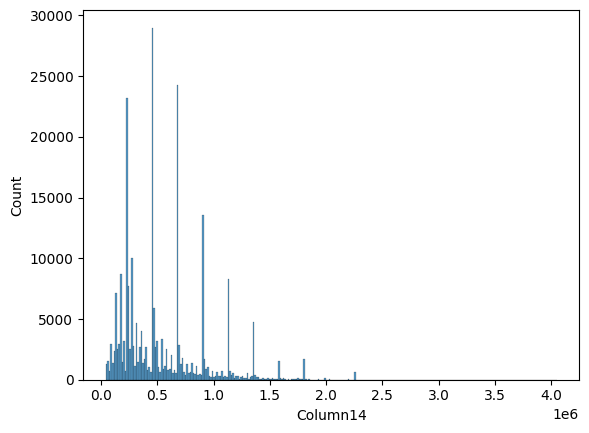

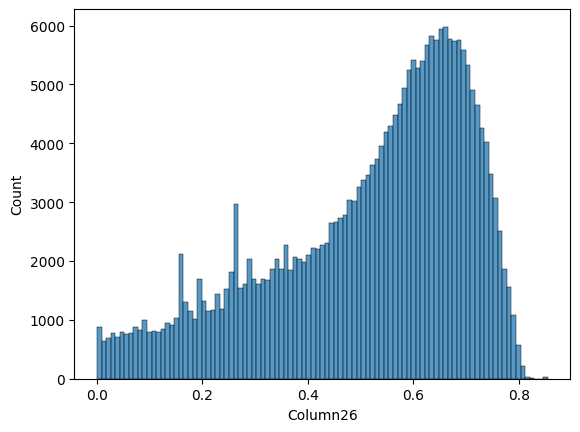

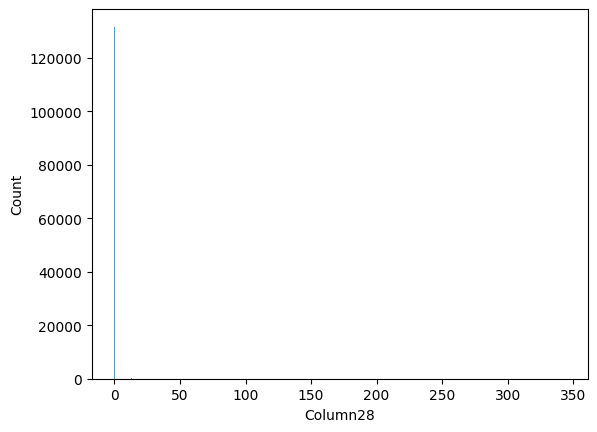

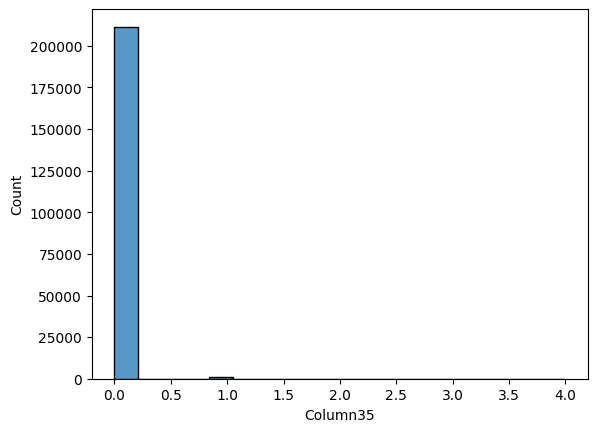

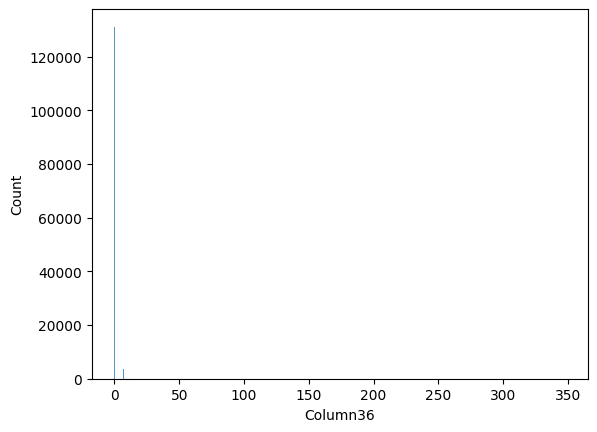

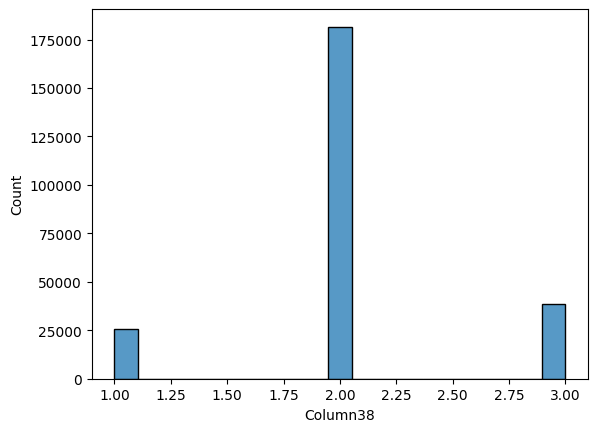

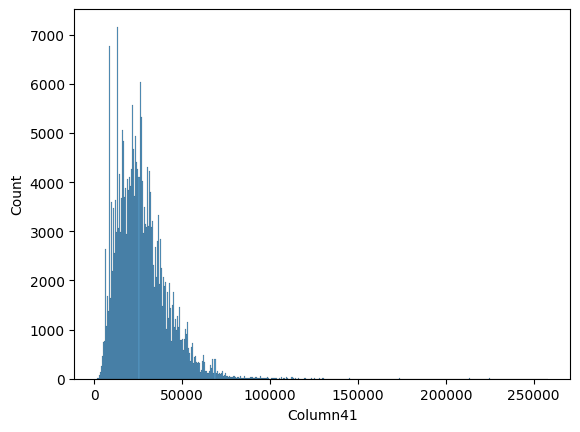

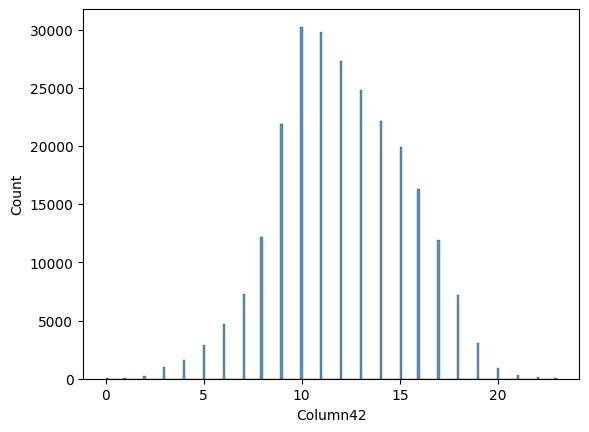

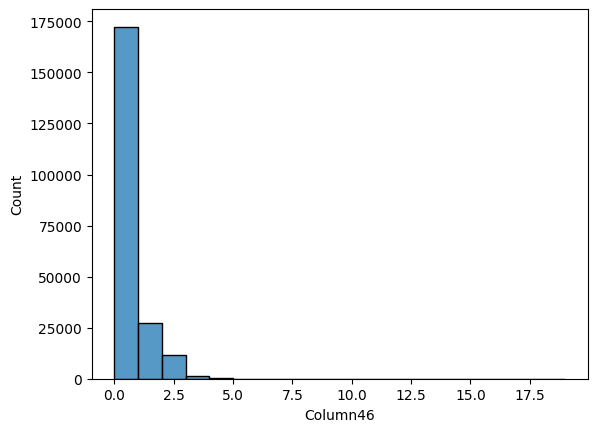

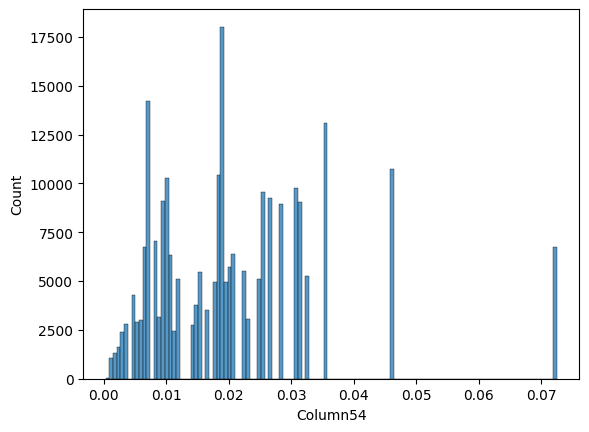

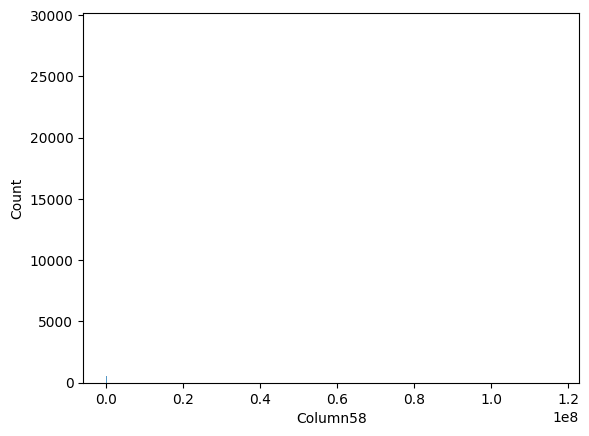

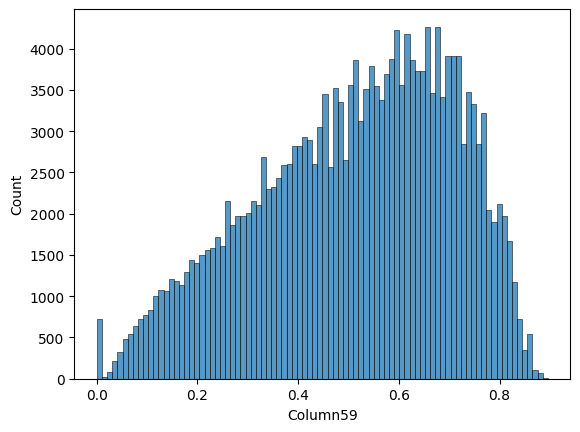

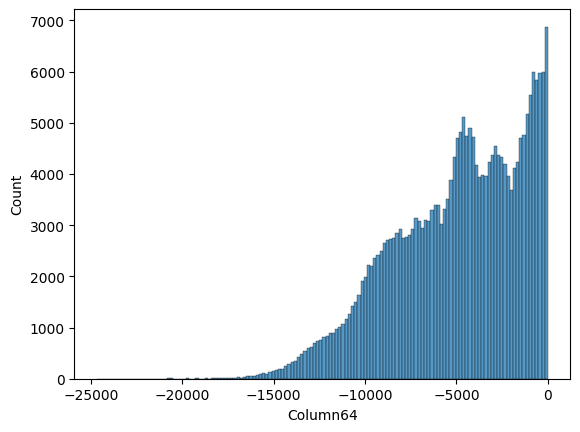

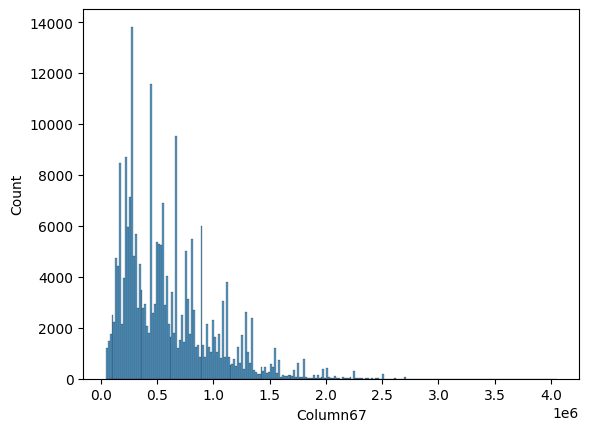

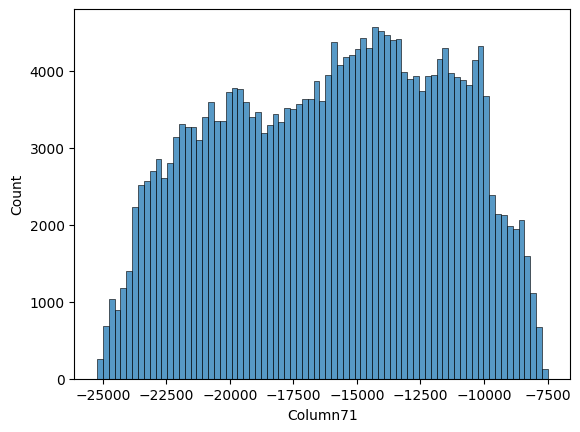

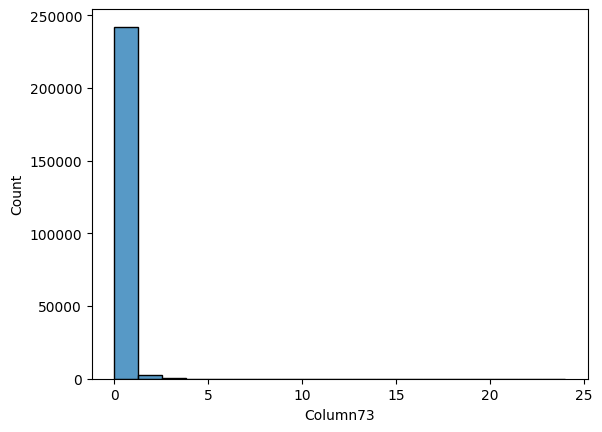

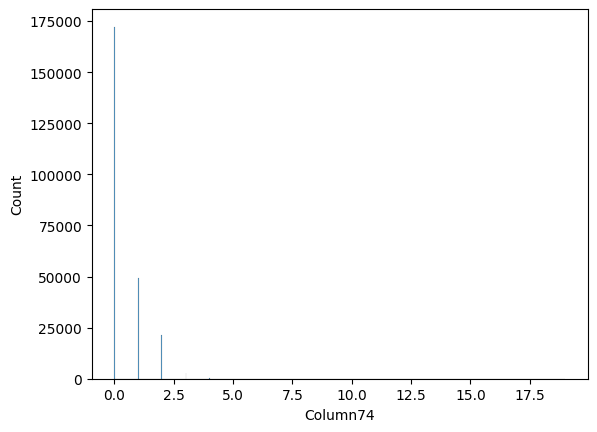

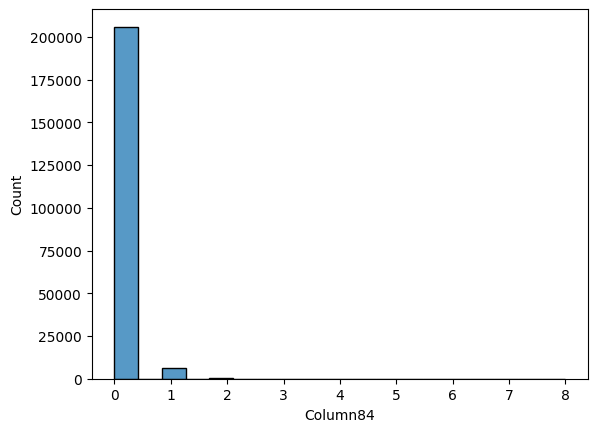

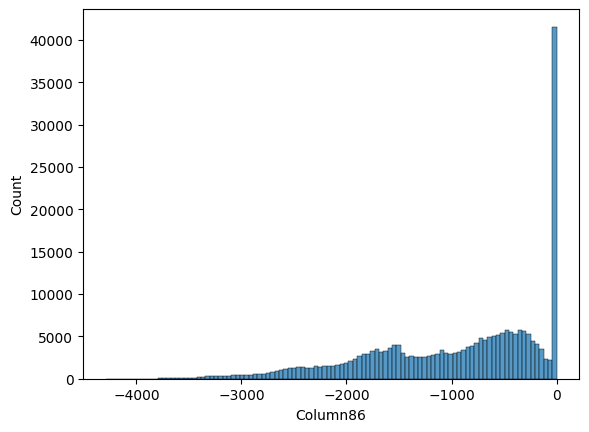

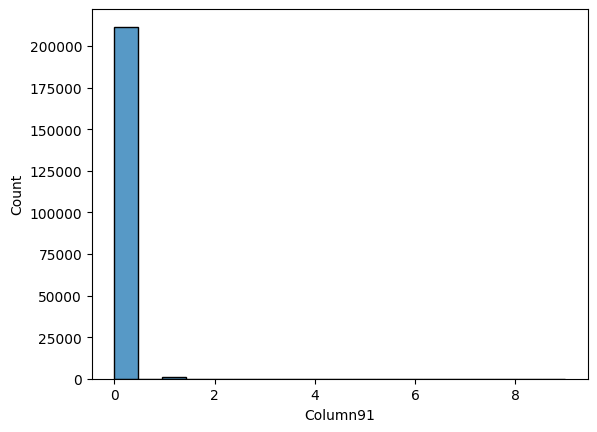

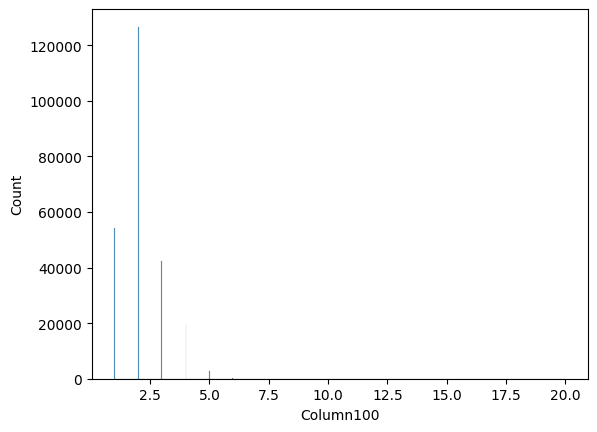

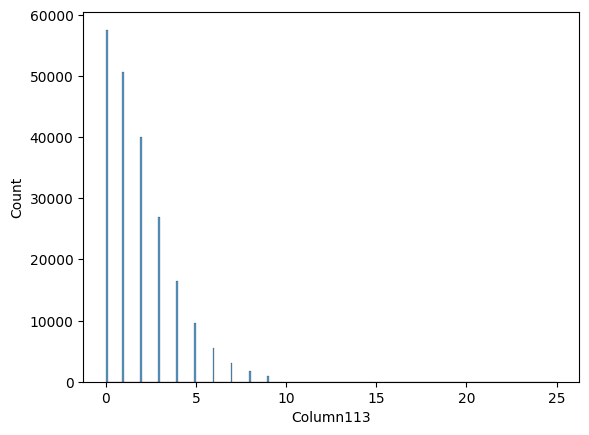

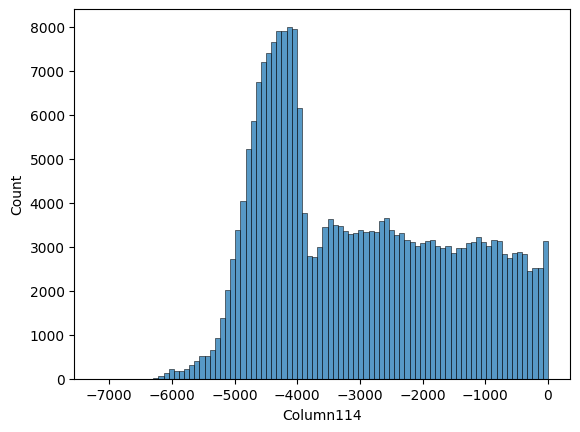

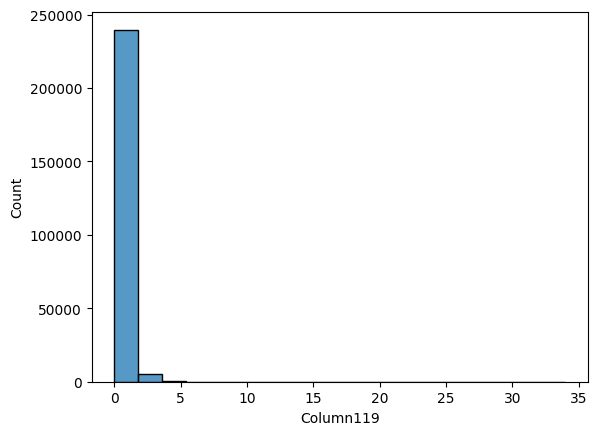

In [17]:
for i in numerical.columns:
    sns.histplot(df, x= i)
    plt.show()

In [18]:
numerical = numerical.drop("Column35", axis= 1)
numerical = numerical.drop("Column84", axis= 1)
numerical = numerical.drop("Column91", axis= 1)
numerical = numerical.drop("Column119", axis= 1)
#After analysis of the histograms I looked further upon the ones i suspected using valuecounts(), which i have now deleted. Basically i deleted what i think are the highly imbalanced independent variables.

In [19]:
numerical.isnull().sum()

Column1          0
Column2          0
Column10         0
Column13     33244
Column14       221
Column26       531
Column28       811
Column36       811
Column38         0
Column41        10
Column42         0
Column46     33244
Column54         0
Column58         0
Column59     48805
Column64         0
Column67         0
Column71         0
Column73       811
Column74         0
Column86         1
Column100        2
Column113    33244
Column114        0
dtype: int64

In [20]:
left = []
right = []
norm = []
for i in numerical.columns:
    if numerical[i].mean() > numerical[i].median():
        left.append(i)
    elif numerical[i].mean() <numerical[i].median():
        right.append(i)
    else:
        norm.append(i)

#Here i check whether the column is skewed or normal distributed, which i know normally distributed to be none since i saw histograms, still. 
#By doing this I will decide whether to impute with median or mean.

In [21]:
for i in numerical.columns:
    if i in left or i in right:
        numerical[i] = numerical[i].fillna(numerical[i].median())

In [22]:
numerical.isnull().sum()

Column1      0
Column2      0
Column10     0
Column13     0
Column14     0
Column26     0
Column28     0
Column36     0
Column38     0
Column41     0
Column42     0
Column46     0
Column54     0
Column58     0
Column59     0
Column64     0
Column67     0
Column71     0
Column73     0
Column74     0
Column86     0
Column100    0
Column113    0
Column114    0
dtype: int64

In [23]:
categorical.isnull().sum()

Column7         0
Column17     1029
Column31        0
Column32        0
Column68        0
Column70        0
Column94        0
Column118       0
dtype: int64

In [24]:
for i in categorical.columns:
    categorical[i] = categorical[i].fillna(categorical[i].mode()[0])

In [25]:
categorical.isnull().sum()

Column7      0
Column17     0
Column31     0
Column32     0
Column68     0
Column70     0
Column94     0
Column118    0
dtype: int64

In [26]:
corr_matr = numerical.corr()

<Axes: >

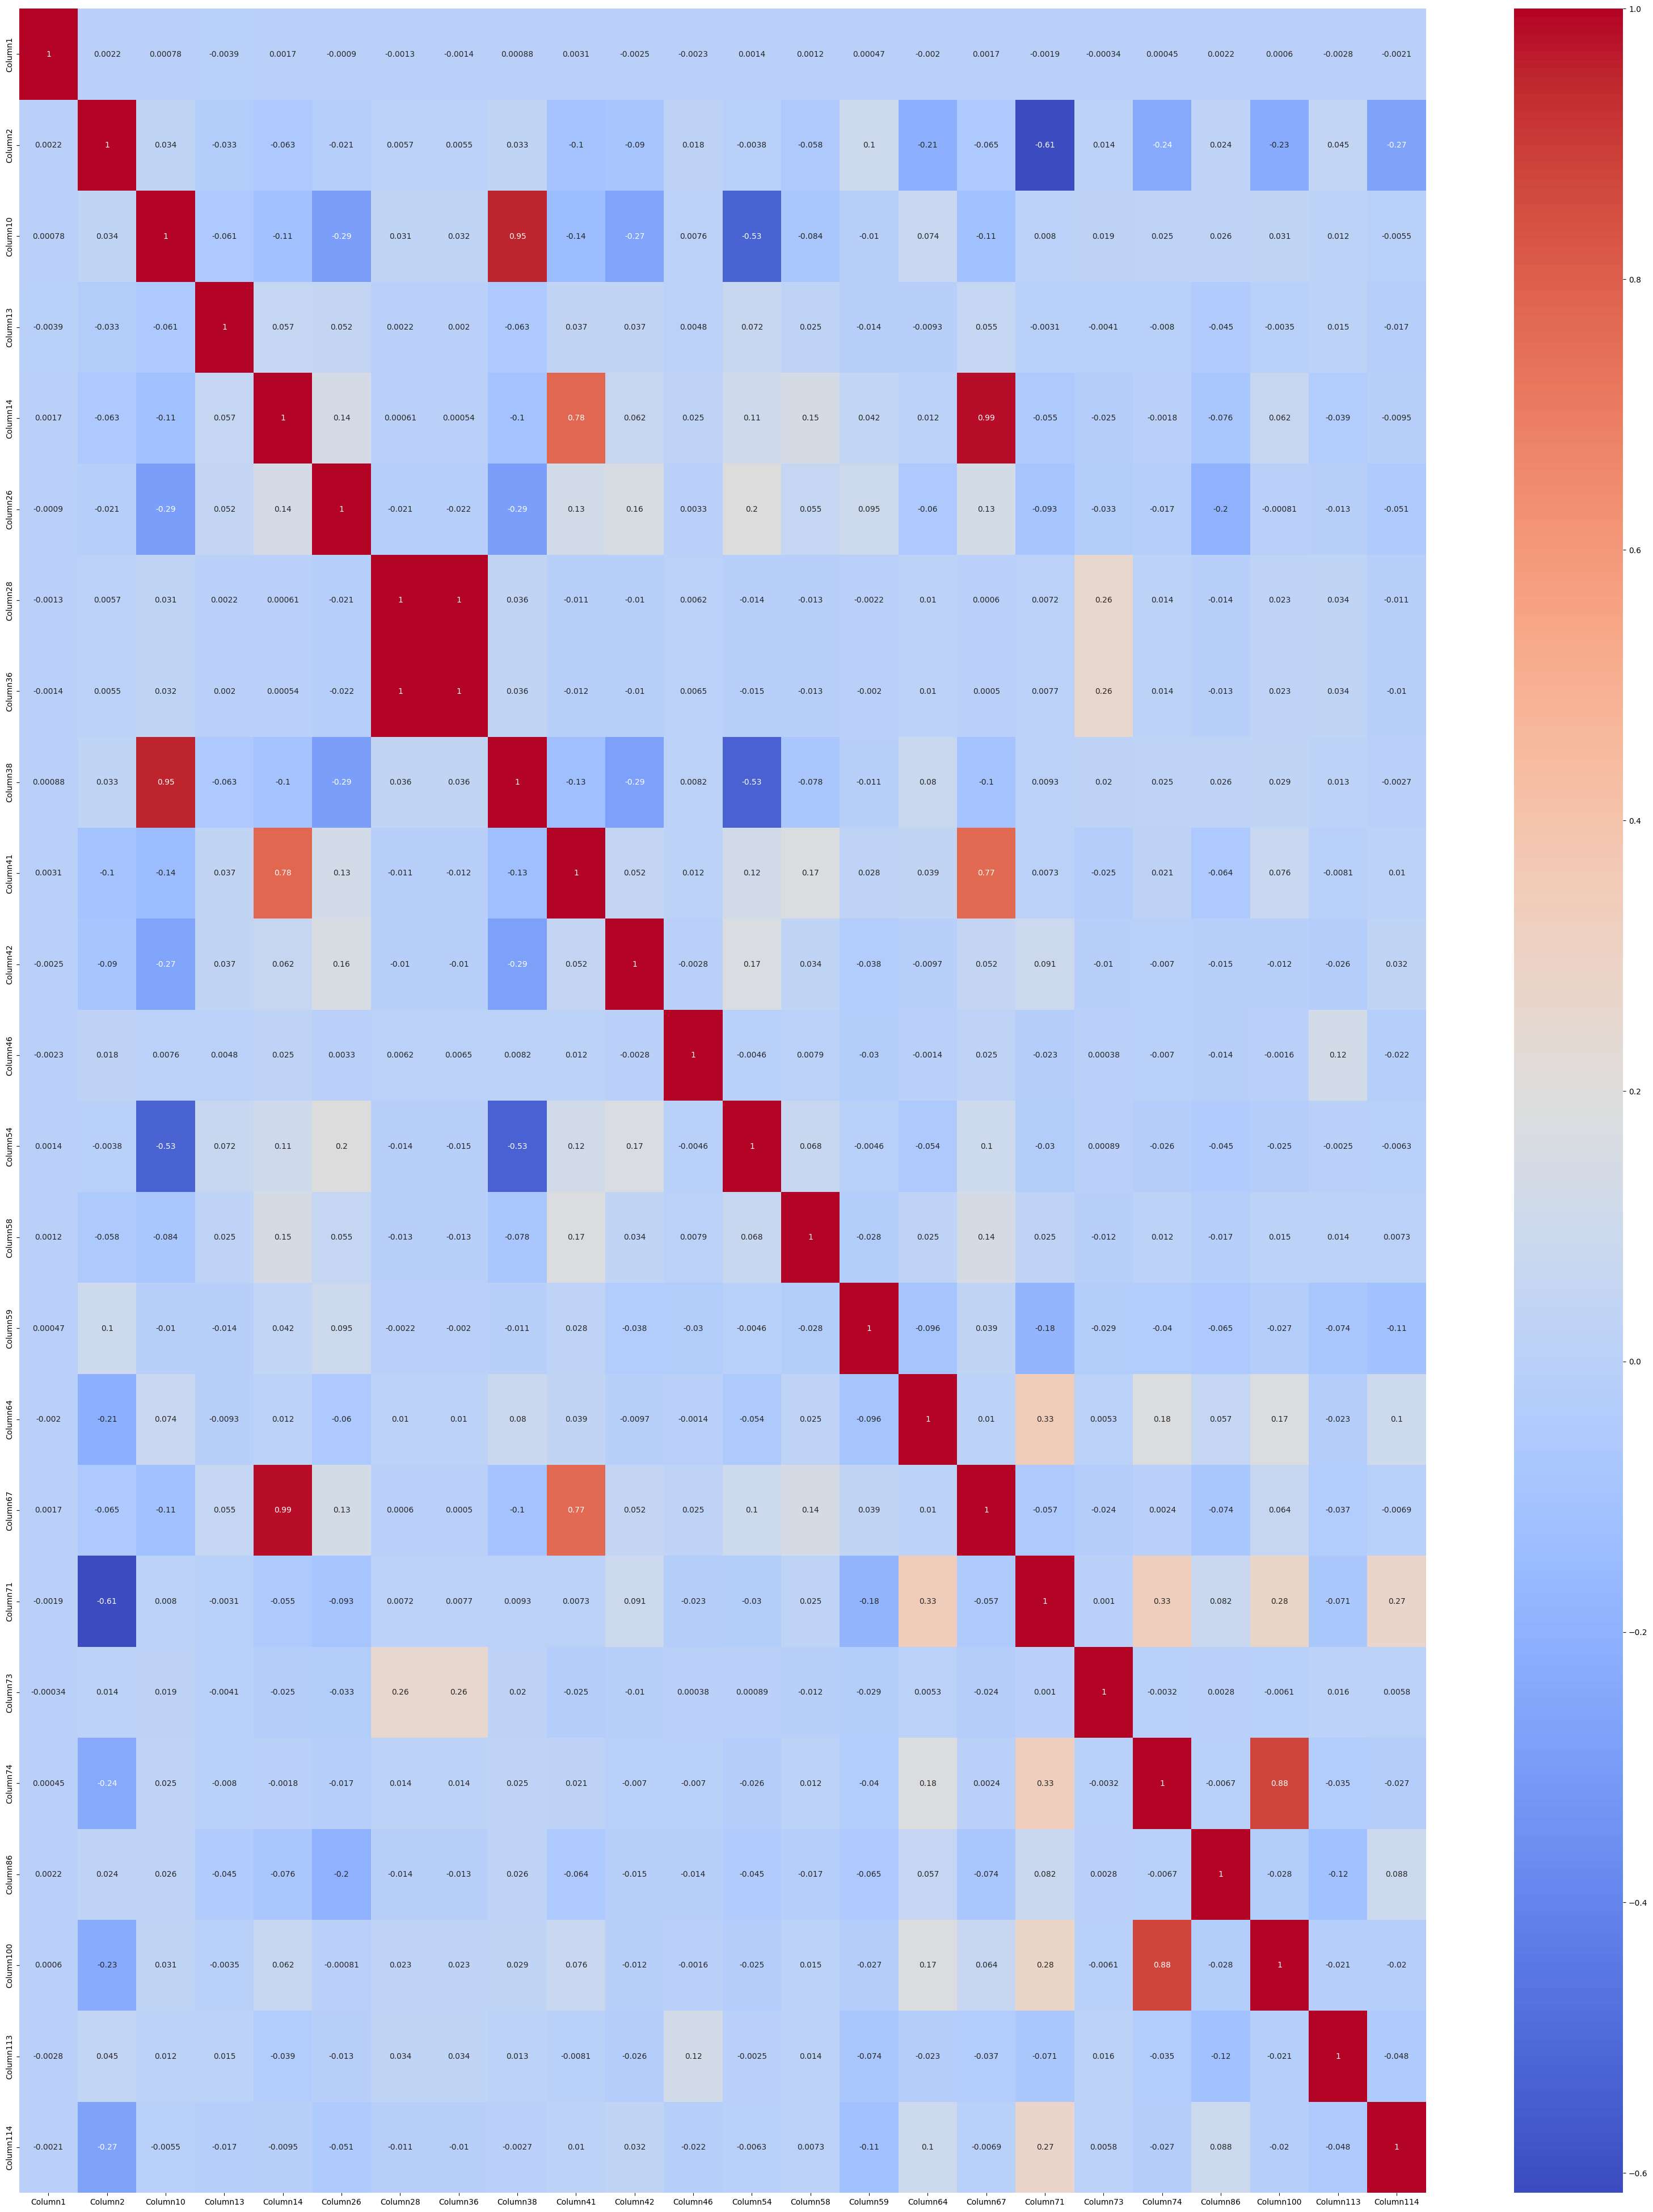

In [27]:
plt.figure(figsize = (40,50))
sns.heatmap(corr_matr, cmap = "coolwarm", annot= True)

In [28]:
for col in corr_matr:
    for index in corr_matr:
        if col != index:
            x = corr_matr.loc[index,col]
            if col in numerical.columns and index in numerical.columns:
                if x > 0.70 or x < -0.70:
                    if numerical[col].std() > numerical[index].std():
                        numerical.drop(index, axis=1, inplace=True)
                    else:
                        numerical.drop(col,axis=1, inplace=True)
#In this parse of code, I check if the correlation matrix value is bigger than a threshold, which is 0.70 here, and then drop the column if it is.

In [29]:
numerical

,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,Column58,Column59,Column64,Column67,Column71,Column73,Column86,Column100,Column113,Column114
0,69769.0,-946.0,0.0,0.289573,0.0,2.0,10.0,1.0,0.008230,90000.0,0.622922,-6378.0,227520.0,-12298.0,0.0,0.0,4.0,1.0,-4670.0
1,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,90000.0,0.535276,-1292.0,161730.0,-15375.0,0.0,-509.0,2.0,1.0,-1994.0
2,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,135000.0,0.598926,-7951.0,728847.0,-19307.0,0.0,-1474.0,1.0,2.0,-2842.0
3,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,135000.0,0.454321,-1033.0,474183.0,-17791.0,0.0,-2016.0,1.0,4.0,-1345.0
4,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,180000.0,0.535276,-2873.0,254700.0,-8486.0,0.0,-695.0,1.0,1.0,-852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161.0,-595.0,0.0,0.549668,1.0,2.0,14.0,0.0,0.035792,135000.0,0.535276,-6831.0,405000.0,-15374.0,0.0,-379.0,3.0,1.0,-4420.0
246004,257069.0,-4334.0,0.0,0.569702,0.0,2.0,8.0,1.0,0.018801,157500.0,0.600658,-8490.0,272520.0,-19035.0,0.0,-374.0,1.0,4.0,-2561.0
246005,154350.0,365243.0,0.0,0.461966,1.0,2.0,11.0,0.0,0.025164,90000.0,0.683269,-8975.0,246357.0,-23088.0,0.0,-1689.0,2.0,1.0,-4636.0
246006,148183.0,365243.0,0.0,0.459173,1.0,3.0,9.0,0.0,0.018209,112500.0,0.812823,-10162.0,810000.0,-22148.0,0.0,-1329.0,2.0,5.0,-4636.0


In [30]:
for i in binary.columns:
    print(binary[i].unique(), i)

['N' 'Y'] Column6
[0 1] Column21
[0 1] Column25
[0 1] Column29
[0 1] Column30
['N' 'Y'] Column48
[0 1] Column51
[0 1] Column53
[0 1] Column56
[0 1] Column63
[1 0] Column65
[0 1] Column72
[0 1] Column99
['Cass' 'Revs'] Column104
[1 0] Column105
[0 1] Column107
[0 1] Column121
[0 1] Column122


In [31]:
N_Y = {
    "N": 0,
    "Y": 1
}
binary.Column6 = binary.Column6.map(N_Y)
binary.Column48 = binary.Column48.map(N_Y)

In [32]:
cs = {
    "Cass": 0,
    "Revs": 1
}
binary.Column104 = binary.Column104.map(cs)

In [33]:
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [34]:
significant = []
for i in categorical.columns:
    crosstable = pd.crosstab(df[i], df["Column122"])
    stats, p, _, _ = chi2_contingency(crosstable)
    print("stats:", stats, "p:", p , i )
    if p < 0.05:
        significant.append(i)
significant

stats: 1278.4011806805574 p: 9.075908541587767e-235 Column7
stats: 29.02507953159027 p: 6.017566490909279e-05 Column17
stats: 953.2727127550494 p: 1.4984123916203551e-201 Column31
stats: 340.96203464157065 p: 1.5442880587627574e-71 Column32
stats: 792.5356183609979 p: 3.1780482931015635e-170 Column68
stats: 733.0215632257117 p: 6.704864221489291e-160 Column70
stats: 13.128498742678737 p: 0.04104015815316855 Column94
stats: 438.59398879108403 p: 1.4171161419017252e-92 Column118


['Column7',
 'Column17',
 'Column31',
 'Column32',
 'Column68',
 'Column70',
 'Column94',
 'Column118']

In [35]:
significantbinary = []
for i in binary.columns:
    if i != "Column122":
        crosstable = pd.crosstab(df[i], df["Column122"])
        stats, p, _, _ = chi2_contingency(crosstable)
        print("stats:", stats, "p:", p , i )
        if p < 0.05:
            significantbinary.append(i)
significantbinary


stats: 108.63962737513312 p: 1.946440281197977e-25 Column6
stats: 139.39484507116094 p: 3.6103484414294767e-32 Column21
stats: 196.85176512174513 p: 1.0159535970862399e-44 Column25
stats: 1.6797967572012809 p: 0.19495146088707693 Column29
stats: 190.50104821861885 p: 2.4715180118662553e-43 Column30
stats: 8.275379776718811 p: 0.004018625611441439 Column48
stats: 273.1150990115483 p: 2.376846532350599e-61 Column51
stats: 10.972646812913544 p: 0.0009246659691875657 Column53
stats: 5.404414337783319 p: 0.02008588693570249 Column56
stats: 0.06942429231762554 p: 0.7921768608521939 Column63
stats: 482.39743332775083 p: 6.427916300951118e-107 Column65
stats: 656.2268393390717 p: 9.883395239528706e-145 Column72
stats: 512.1165599272894 p: 2.196411354035732e-113 Column99
stats: 232.07198931798365 p: 2.1061285811445983e-52 Column104
stats: 529.3681684586927 p: 3.876210545465272e-117 Column105
stats: 0.025855965514736314 p: 0.8722525771398179 Column107
stats: 18.04369273846199 p: 2.15892692015732

['Column6',
 'Column21',
 'Column25',
 'Column30',
 'Column48',
 'Column51',
 'Column53',
 'Column56',
 'Column65',
 'Column72',
 'Column99',
 'Column104',
 'Column105',
 'Column121']

In [36]:
categorical = categorical[significant]

In [37]:
significantbinary.append("Column122")

In [38]:
significantbinary

['Column6',
 'Column21',
 'Column25',
 'Column30',
 'Column48',
 'Column51',
 'Column53',
 'Column56',
 'Column65',
 'Column72',
 'Column99',
 'Column104',
 'Column105',
 'Column121',
 'Column122']

In [39]:
binary = binary[significantbinary]


In [40]:
binary

,Column6,Column21,Column25,Column30,Column48,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
246004,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
246005,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
246006,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1


In [41]:
df = pd.concat([categorical, numerical, binary], axis= 1)

In [42]:
df

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118,Column1,Column2,...,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,Bus2,Unad,Come,Hout,Hign,F,WEDY,Mard,69769.0,-946.0,...,0,0,0,1,0,0,0,1,0,0
1,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard,236977.0,-92.0,...,1,0,0,1,1,0,0,1,0,0
2,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind,168821.0,-1646.0,...,0,0,0,1,0,0,0,1,0,1
3,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind,94708.0,-1651.0,...,0,0,0,1,0,0,0,1,0,1
4,Rest,Unad,Come,Hout,Incr,F,MONY,Sind,84556.0,-977.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard,248161.0,-595.0,...,0,0,0,0,0,0,1,1,0,0
246004,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind,257069.0,-4334.0,...,0,0,0,1,0,0,0,1,0,0
246005,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive,154350.0,365243.0,...,0,0,0,0,0,0,0,0,0,0
246006,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard,148183.0,365243.0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
df =df[df["Column70"] != "XNA"]
df =df[df["Column118"] != "Unkn"]

In [44]:
df

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118,Column1,Column2,...,Column51,Column53,Column56,Column65,Column72,Column99,Column104,Column105,Column121,Column122
0,Bus2,Unad,Come,Hout,Hign,F,WEDY,Mard,69769.0,-946.0,...,0,0,0,1,0,0,0,1,0,0
1,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard,236977.0,-92.0,...,1,0,0,1,1,0,0,1,0,0
2,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind,168821.0,-1646.0,...,0,0,0,1,0,0,0,1,0,1
3,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind,94708.0,-1651.0,...,0,0,0,1,0,0,0,1,0,1
4,Rest,Unad,Come,Hout,Incr,F,MONY,Sind,84556.0,-977.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard,248161.0,-595.0,...,0,0,0,0,0,0,1,1,0,0
246004,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind,257069.0,-4334.0,...,0,0,0,1,0,0,0,1,0,0
246005,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive,154350.0,365243.0,...,0,0,0,0,0,0,0,0,0,0
246006,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard,148183.0,365243.0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
obj = []
for i in df.columns:
    if df[i].dtypes == "object":
        if set(df[i].unique()) != {0,1}:
            obj.append(i)

In [47]:
df[obj]

,Column7,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Bus2,Unad,Come,Hout,Hign,F,WEDY,Mard
1,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard
2,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind
3,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind
4,Rest,Unad,Come,Hout,Incr,F,MONY,Sind
...,...,...,...,...,...,...,...,...
246003,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard
246004,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind
246005,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive
246006,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard


In [48]:
columnstoencode = []
for i in df[obj].columns:
    if i != "Column7":
        columnstoencode.append(i)

In [49]:
columnstoencode = df[columnstoencode]
columnstoencode

,Column17,Column31,Column32,Column68,Column70,Column94,Column118
0,Unad,Come,Hout,Hign,F,WEDY,Mard
1,Unad,Come,Hout,Secl,M,TUEY,Mard
2,Spor,Worg,Hout,Secl,M,TUEY,Sind
3,Unad,Come,Hout,Secl,M,TUEY,Sind
4,Unad,Come,Hout,Incr,F,MONY,Sind
...,...,...,...,...,...,...,...
246003,Unad,Come,Hout,Secl,F,MONY,Mard
246004,Unad,Stat,Hout,Secl,F,MONY,Sind
246005,Unad,Penr,Hout,Secl,F,SUNY,Cive
246006,Chin,Penr,Hout,Secl,F,WEDY,Mard


In [50]:
onehot = OneHotEncoder()
onehot.fit(columnstoencode)

OneHotEncoder()

In [51]:
transformed = onehot.transform(columnstoencode)

In [52]:
transformeddf = pd.DataFrame(transformed.toarray(), columns= onehot.get_feature_names_out())
transformeddf.head(-50)

,Column17_Chin,Column17_Famy,Column17_Groe,Column17_OthA,Column17_OthB,Column17_Spor,Column17_Unad,Column31_Busn,Column31_Come,Column31_Mate,...,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Widw
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245949,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
245950,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
245951,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
245952,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
df= df.drop(columnstoencode, axis=1)

In [54]:
df = pd.concat([df, transformeddf],axis=1)

In [55]:
df

,Column7,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,...,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Widw
0,Bus2,69769.0,-946.0,0.0,0.289573,0.0,2.0,10.0,1.0,0.008230,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Othr,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Bus3,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Bus3,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Rest,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246007,XNAA,5167.0,365243.0,1.0,0.008171,9.0,2.0,12.0,0.0,0.018850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
166988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
label = LabelEncoder()
label.fit(df.Column7)
df.Column7 = label.transform(df.Column7)

In [57]:
df

,Column7,Column1,Column2,Column13,Column26,Column36,Column38,Column42,Column46,Column54,...,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,Column118_Widw
0,4,69769.0,-946.0,0.0,0.289573,0.0,2.0,10.0,1.0,0.008230,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,30,236977.0,-92.0,0.0,0.514261,2.0,3.0,13.0,0.0,0.003069,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5,168821.0,-1646.0,0.0,0.486906,1.0,3.0,5.0,0.0,0.020713,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,94708.0,-1651.0,0.0,0.675705,2.0,2.0,10.0,0.0,0.011703,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35,84556.0,-977.0,0.0,0.154565,0.0,2.0,5.0,0.0,0.006629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246007,50,5167.0,365243.0,1.0,0.008171,9.0,2.0,12.0,0.0,0.018850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40298,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100817,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
166988,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
df = df.sort_index(axis=1)

In [59]:
df

,Column1,Column100,Column104,Column105,Column113,Column114,Column118_Cive,Column118_Mard,Column118_Sepd,Column118_Sind,...,Column73,Column86,Column94_FRIY,Column94_MONY,Column94_SATY,Column94_SUNY,Column94_THUY,Column94_TUEY,Column94_WEDY,Column99
0,69769.0,4.0,0.0,1,1.0,-4670.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,236977.0,2.0,0.0,1,1.0,-1994.0,0.0,1.0,0.0,0.0,...,0.0,-509.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,168821.0,1.0,0.0,1,2.0,-2842.0,0.0,0.0,0.0,1.0,...,0.0,-1474.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,94708.0,1.0,0.0,1,4.0,-1345.0,0.0,0.0,0.0,1.0,...,0.0,-2016.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,84556.0,1.0,0.0,1,1.0,-852.0,0.0,0.0,0.0,1.0,...,0.0,-695.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246007,5167.0,2.0,0.0,0,3.0,-4266.0,NaN,NaN,NaN,NaN,...,0.0,-720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
40298,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
100817,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
166988,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [60]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [61]:
X = df.drop("Column122",axis=1)

In [62]:
y= df.Column122

In [63]:
rand = RandomForestClassifier(random_state=42)
rfe = RFE(rand)

In [64]:
params = {
    "n_features_to_select": [5,10,15,None],
}

In [67]:
gridforrfe = GridSearchCV(rfe, params, n_jobs=5, verbose= 3)


In [68]:
gridforrfe.fit(X,y)
bestforrfe = gridforrfe.best_estimator_
bestforrfe

Fitting 5 folds for each of 4 candidates, totalling 20 fits


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 260, in _fit
    X, y = self._validate_data(
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 299, in _fit
    estimator.fit(X[:, features], y, **fit_params)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py", line 746, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'unknown'
